# ITU YZV302(3)E Deep Learning Course Fall 2024

# HW3

# Q3: Time Series Prediction (40 pts)

In this notebook, you will predict traffic density by using recurrent neural networks on ibb traffic dataset. The IBB traffic dataset can be downloaded from the IBB data lake. 
Here you shall locate a specific traffic sensor with given coordinates. For example, locate the one on one of the bridges. Retrieve its traffic density (number of vehicles). 

* a) First explore the data. Plot it. Analyse its behaviour, periodicity (seasonality), trends etc. Discuss how these might impact your predictions (2.5 pts)  
* b) Prepare the training and test sets by windowing the dataset. Choose a windowing pattern (for example use 1 previous steps to predict the next time step). This is the simplest case. (2.5 pts)
* c) Compare the performance of the following (35 pts)
* 1) baseline predictor (repeat the previous value), (2.5 pts)
  2) linear layer(2.5 pts)
  3) RNN,(9 pts)
  4) CNN (9 pts)
* Advanced Methods: You can try something else (temporal convolution network or you can learn to use a huggingface pre-trained transformer model work) (12pts)

## Load and prepare the data

Start by loading and preparing the data.  This is what I have downloaded. 

https://data.ibb.gov.tr/dataset/hourly-traffic-density-data-set/resource/0c7d60f3-8349-4836-a1c2-56ec93cbbd50


In [1]:
import torch
import numpy as np
import torchvision
import random
import os
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# For standardized outputs

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed = 42
seed_everything(seed)

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [4]:
import pandas as pd

# Replace 'file_path.csv' with the actual path to your CSV file
file_path = 'traffic_density__202404.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been read correctly
print(df.head())

             DATE_TIME  LONGITUDE   LATITUDE GEOHASH  MINIMUM_SPEED  \
0  2024-04-01 00:00:00  28.866577  40.976257  sxk90g              7   
1  2024-04-01 00:00:00  28.943481  41.042175  sxk96x              2   
2  2024-04-01 00:00:00  28.504028  41.108093  sxk3be             56   
3  2024-04-01 00:00:00  29.075317  40.976257  sxk9je              4   
4  2024-04-01 00:00:00  28.767700  41.036682  sxk3qw             10   

   MAXIMUM_SPEED  AVERAGE_SPEED  NUMBER_OF_VEHICLES  
0            118             56                  62  
1            114             52                 324  
2            126             85                  26  
3             56             29                  57  
4            126             45                  57  


### Choose a sensor
I opened a google map and click on a position near Bosphorus bridge to get the coordinates. 

(41.090993027850395, 29.05591900054121)


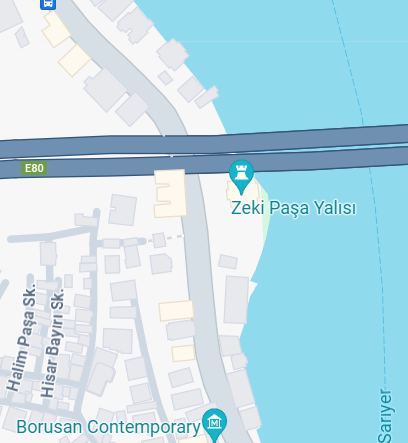


In [5]:
df['Distance'] = ((df['LATITUDE'] - 41.090993027850395)**2 + (df['LONGITUDE'] - 29.05591900054121)**2)**0.5



Closest sensor:
DATE_TIME             2024-04-01 00:00:00
LONGITUDE                       29.053345
LATITUDE                        41.091614
GEOHASH                            sxk9v0
MINIMUM_SPEED                          16
MAXIMUM_SPEED                         158
AVERAGE_SPEED                          88
NUMBER_OF_VEHICLES                    214
Distance                         0.002648
Name: 465, dtype: object


C:\Users\fbtek\AppData\Local\Temp\ipykernel_8180\2125624428.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closest_sensor_data['DATE_TIME'] = pd.to_datetime(closest_sensor_data['DATE_TIME'])


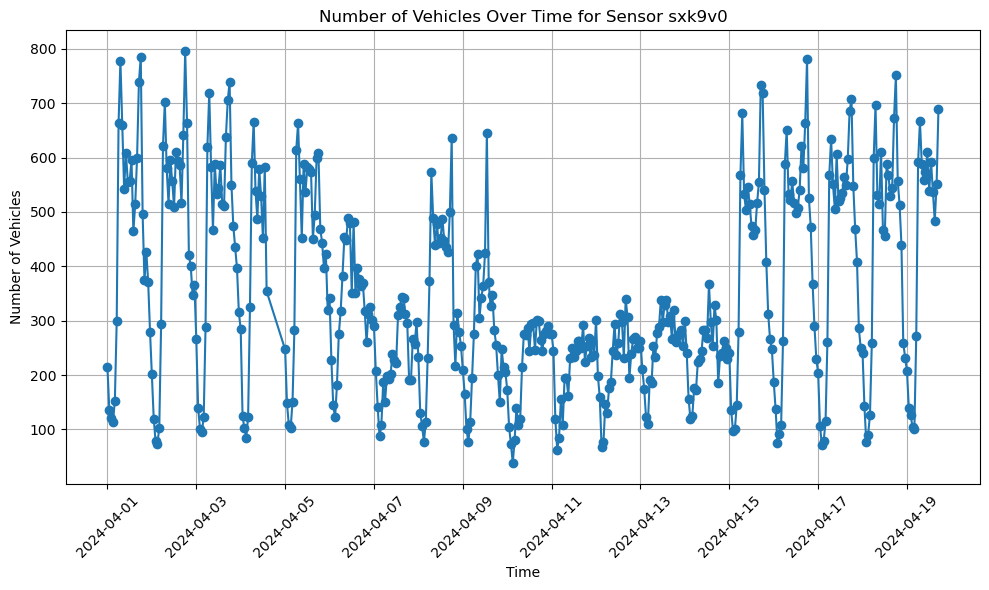

In [6]:
# Select the sensor with the smallest distance
closest_sensor = df.loc[df['Distance'].idxmin()]


## Divide the data into train and test set parts. 
I used last 110 samples for test and remaining for train. 

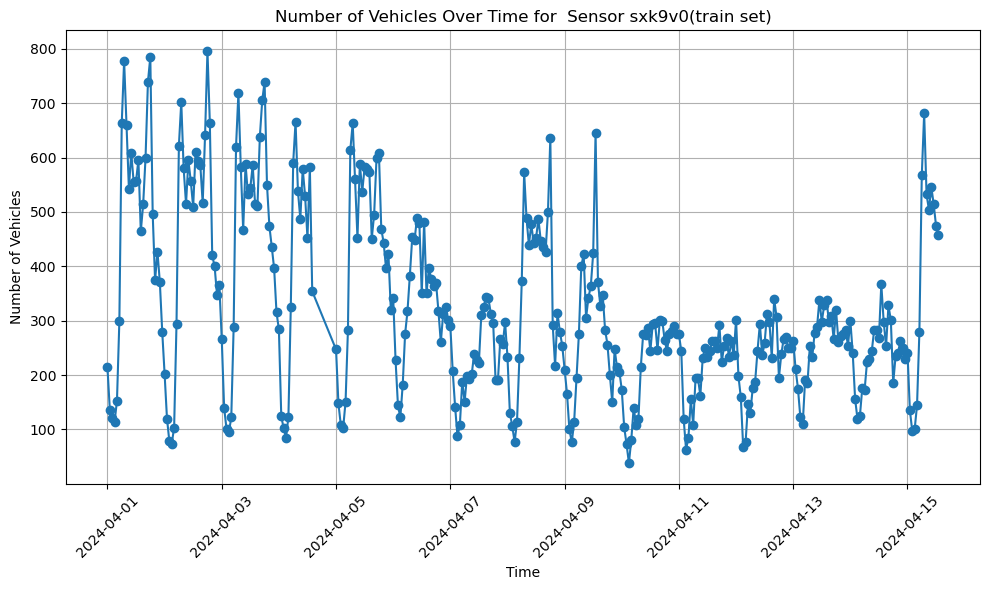

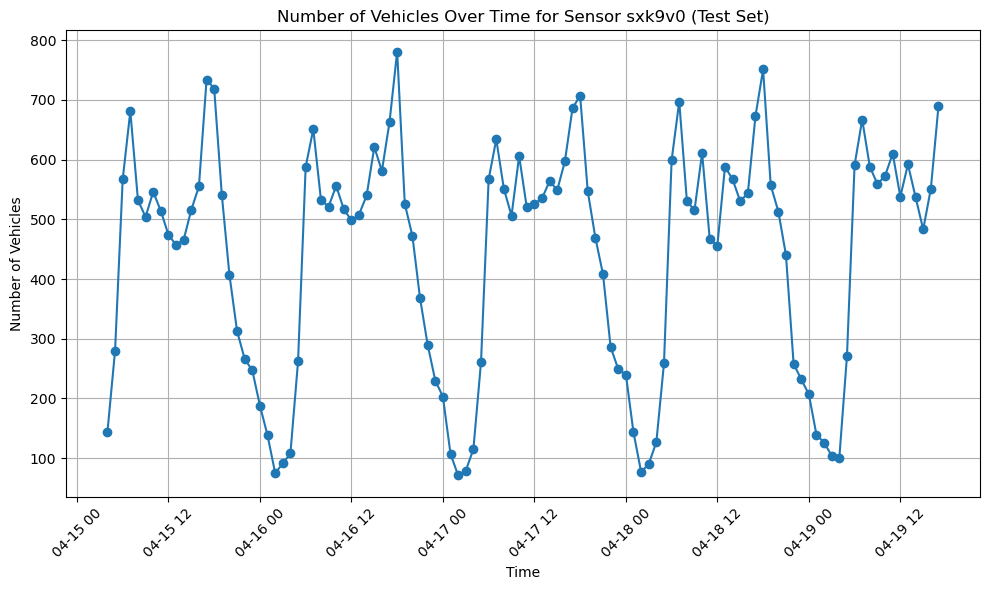

In [7]:


# Take the last 100 readings as the test set



# Remove the test set readings from the closest_sensor_data DataFrame


# Plot time label versus number of vehicles for the training set


# Plot time label versus number of vehicles for the test set


## Write a function to prepare the input-target pairs. 
The function basically receives the dataframe and returns X, y numpy arrays with the given prediction window size. 

We can use the actual number of vehicles value, but I scaled it, divided the number of vehicles to 1000 to make the range simple.

In [8]:
import numpy as np
SCALER = 1000.0
def prepare_input_sequences(data, window_size):
    X = []
    y = []
    
    X = np.array(X)
    y = np.array(y)
    
    return X, y


# Print the shape of the input sequences and target values
print("Shape of input sequences (X_test):", X_test.shape)
print("Shape of target values (y_test):", y_test.shape)


Shape of input sequences (X_train): (438, 3)
Shape of target values (y_train): (438,)
Shape of input sequences (X_test): (107, 3)
Shape of target values (y_test): (107,)


## a) Calculate a baseline Prediction score by repeating the previous value

For example:

y_test
array([0.537, 0.592, 0.538, 0.61 ])

prediction is 

array([0.144, 0.537, 0.592, 0.538])



In [9]:
# Predictions using baseline (repeating the current value)
#baseline_predictions = X_test[:,-1]
#baseline_predictions = np.zeros(baseline_predictions.shape[0]+1)
baseline_predictions =y_test
                        
                                
baseline_predictions = np.roll(baseline_predictions, 1)

# Calculate the Mean Absolute Error (MAE) for the baseline predictor


print("Baseline MAE:", baseline_mae)


Baseline MAE: 0.08214953271028036


## Plot the baseline prediction vs y_test on the same plot

Yes, it looks very similar acceptible but that is a bit illusion. See the error plot. Which shows errors in each time-step

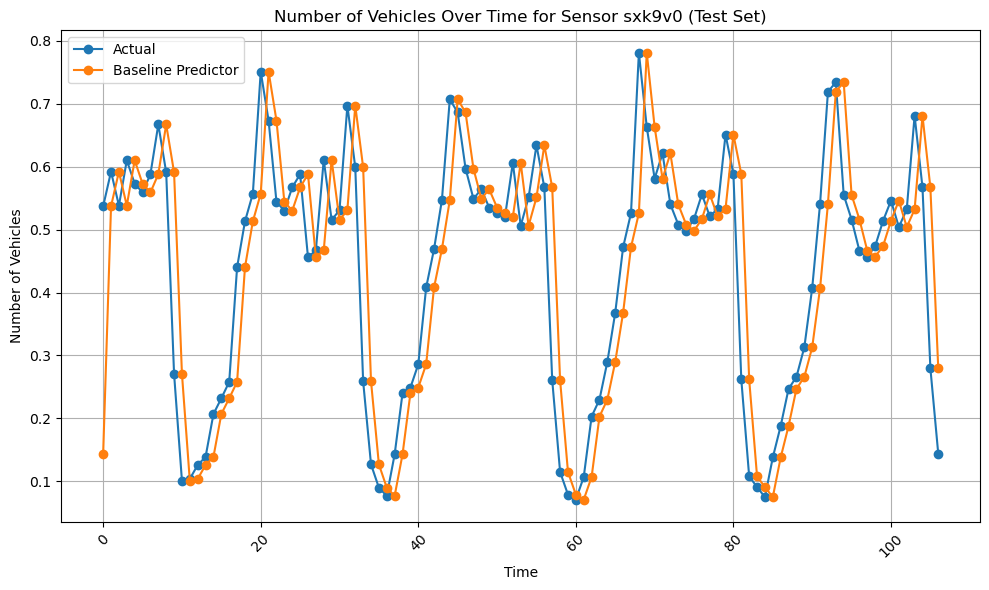

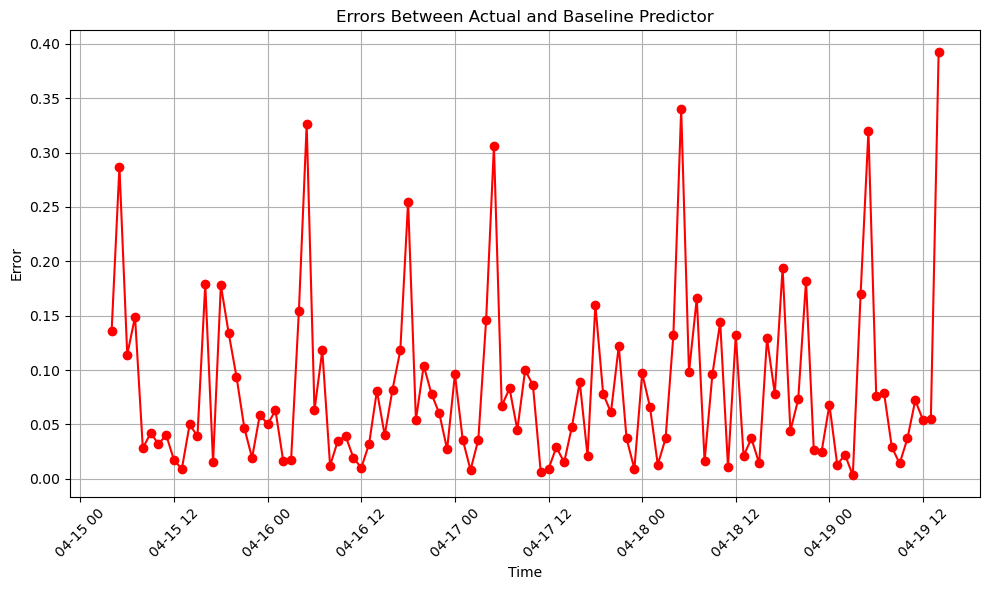

### Implement a model trainer, given a model, x and y , criterion, optimizer, batch_size and epochs it trains a a model

* I recommend starting with batch_size=1, because data is so small. Also you may need a grad_clip in some cases to control the exploding gradient.


### Implement a linear model.  LinearPredictor 


You can try with different predictor window_sizes my result is just using previous 6 value to predict the next value. Linear(1,1)

In [15]:
# Define input size (number of features in each input sequence)
input_size = 6

# Prepare input sequences and target values for the test set
window_size = input_size

# Define output size (number of features in each prediction)
output_size = 1

# Initialize the model
lin_model = LinearPredictor(input_size, output_size)

# Print the model architecture
print(lin_model)

X_train, y_train = prepare_input_sequences(train_set, window_size)

# Print the shape of the input sequences and target values
print("Shape of input sequences (X_train):", X_train.shape)
print("Shape of target values (y_train):", y_train.shape)


# Prepare input sequences and target values for the test set
X_test, y_test = prepare_input_sequences(test_set, window_size)

# Print the shape of the input sequences and target values
print("Shape of input sequences (X_test):", X_test.shape)
print("Shape of target values (y_test):", y_test.shape)

LinearPredictor(
  (fc): Linear(in_features=6, out_features=1, bias=True)
)
Shape of input sequences (X_train): (435, 6)
Shape of target values (y_train): (435,)
Shape of input sequences (X_test): (104, 6)
Shape of target values (y_test): (104,)


C:\Users\fbtek\miniconda3\envs\trch\Lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch [10/500], Loss: 0.0694
Epoch [20/500], Loss: 0.0686
Epoch [30/500], Loss: 0.0658
Epoch [40/500], Loss: 0.0692
Epoch [50/500], Loss: 0.0667
Epoch [60/500], Loss: 0.0644
Epoch [70/500], Loss: 0.0696
Epoch [80/500], Loss: 0.0674
Epoch [90/500], Loss: 0.0663
Epoch [100/500], Loss: 0.0655
Epoch [110/500], Loss: 0.0685
Epoch [120/500], Loss: 0.0669
Epoch [130/500], Loss: 0.0689
Epoch [140/500], Loss: 0.0697
Epoch [150/500], Loss: 0.0669
Epoch [160/500], Loss: 0.0688
Epoch [170/500], Loss: 0.0647
Epoch [180/500], Loss: 0.0704
Epoch [190/500], Loss: 0.0678
Epoch [200/500], Loss: 0.0676
Epoch [210/500], Loss: 0.0662
Epoch [220/500], Loss: 0.0665
Epoch [230/500], Loss: 0.0678
Epoch [240/500], Loss: 0.0672
Epoch [250/500], Loss: 0.0686
Epoch [260/500], Loss: 0.0656
Epoch [270/500], Loss: 0.0691
Epoch [280/500], Loss: 0.0653
Epoch [290/500], Loss: 0.0682
Epoch [300/500], Loss: 0.0670
Epoch [310/500], Loss: 0.0669
Epoch [320/500], Loss: 0.0676
Epoch [330/500], Loss: 0.0669
Epoch [340/500], Lo

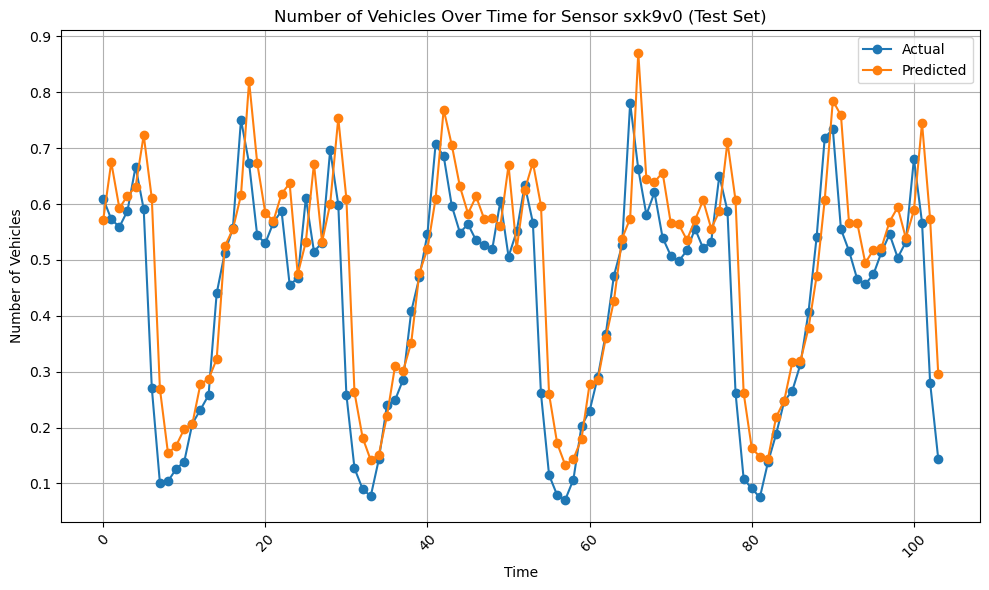

In [16]:
# Define a model, criterion, optimizer, and training parameters


### Implement a RNN model.  RNNPredictor 


You can try with different predictor window_sizes my result is just using previous 1 value to predict the next value. My model was as follows:

rnn_model = RNNPredictor(1, 64, 1)

I did not clean the errors in first or last time-steps. I am sure you can do better.

In [18]:
# Prepare input sequences and target values for the test set
window_size = 1
X_train, y_train = prepare_input_sequences(train_set, window_size)

# Print the shape of the input sequences and target values
print("Shape of input sequences (X_train):", X_train.shape)
print("Shape of target values (y_train):", y_train.shape)


# Prepare input sequences and target values for the test set
X_test, y_test = prepare_input_sequences(test_set, window_size)

# Print the shape of the input sequences and target values
print("Shape of input sequences (X_test):", X_test.shape)
print("Shape of target values (y_test):", y_test.shape)

Shape of input sequences (X_train): (440, 1)
Shape of target values (y_train): (440,)
Shape of input sequences (X_test): (109, 1)
Shape of target values (y_test): (109,)


RNNPredictor(
  (rnn): RNN(1, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)
Epoch [10/500], Loss: 0.0896
Epoch [20/500], Loss: 0.0754
Epoch [30/500], Loss: 0.0663
Epoch [40/500], Loss: 0.0617
Epoch [50/500], Loss: 0.0597
Epoch [60/500], Loss: 0.0593
Epoch [70/500], Loss: 0.0588
Epoch [80/500], Loss: 0.0584
Epoch [90/500], Loss: 0.0582
Epoch [100/500], Loss: 0.0584
Epoch [110/500], Loss: 0.0578
Epoch [120/500], Loss: 0.0572
Epoch [130/500], Loss: 0.0572
Epoch [140/500], Loss: 0.0561
Epoch [150/500], Loss: 0.0571
Epoch [160/500], Loss: 0.2470
Epoch [170/500], Loss: 0.1841
Epoch [180/500], Loss: 0.2158
Epoch [190/500], Loss: 0.1970
Epoch [200/500], Loss: 0.2607
Epoch [210/500], Loss: 0.1744
Epoch [220/500], Loss: 0.1372
Epoch [230/500], Loss: 0.1449
Epoch [240/500], Loss: 0.1174
Epoch [250/500], Loss: 0.1120
Epoch [260/500], Loss: 0.0975
Epoch [270/500], Loss: 0.1035
Epoch [280/500], Loss: 0.0845
Epoch [290/500], Loss: 0.0868
Epoch [300/500], Loss: 0.08

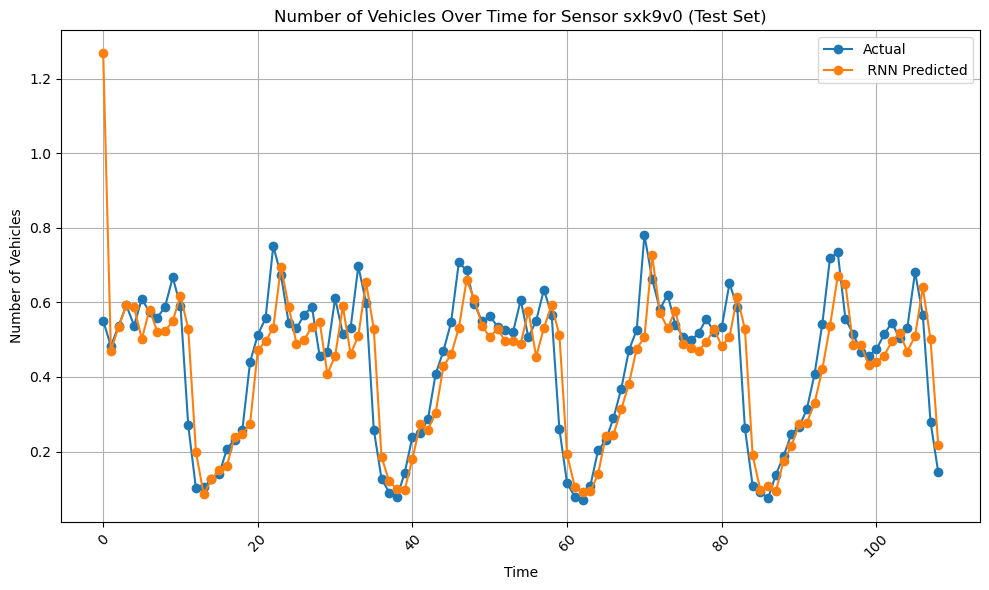

## Implement a CNN model. CNNPredictor
You can try with different predictor window_sizes my result is just using previous 1 value to predict the next value. My model was as follows:

cnn_model = ConvPredictor(1, num_filters=4, 1

I did not clean the errors in first or last time-steps. I am sure you can do better.

However, applying convolution, make sure you do not break the causality. Using the future values (to be predicted values) as input in the model. 

In [25]:
import torch.nn as nn


ConvPredictor(
  (conv1): Conv1d(1, 4, kernel_size=(3,), stride=(1,), padding=(1,))
  (fc): Linear(in_features=4, out_features=1, bias=True)
  (act): Tanh()
)
Epoch [10/100], Loss: 0.1210
Epoch [20/100], Loss: 0.1164
Epoch [30/100], Loss: 0.1172
Epoch [40/100], Loss: 0.1159
Epoch [50/100], Loss: 0.1154
Epoch [60/100], Loss: 0.1147
Epoch [70/100], Loss: 0.1133
Epoch [80/100], Loss: 0.1126
Epoch [90/100], Loss: 0.1115
Epoch [100/100], Loss: 0.1106
Training finished!


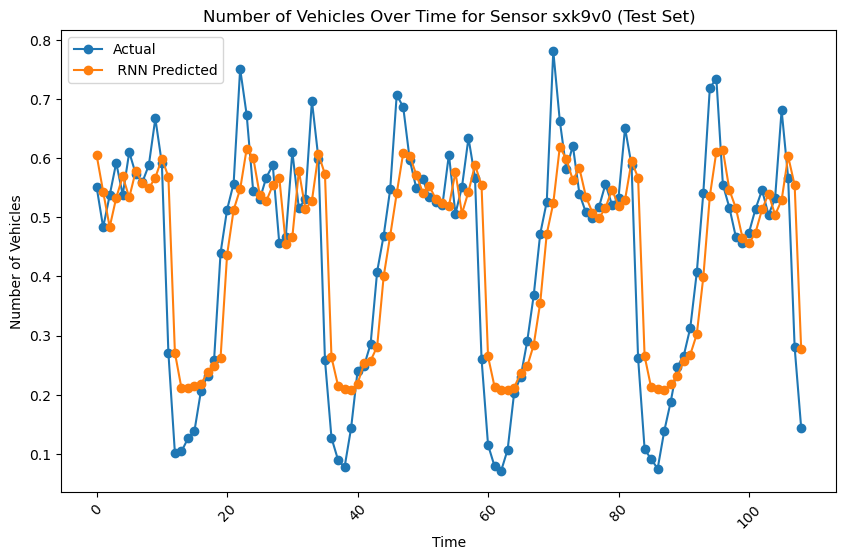

In [27]:
# Define the hidden size (number of features in the hidden state)


## Train an Temporal Convolution Network or Transformer model. What factors influenced your decision?
a) Explain the important features of the dataset (e.g., size, patterns, noise, or missing values) that affected your choice of model. Compare these features with the strengths and weaknesses of TCNs and Transformers.

b) Which pre-trained transformer model (if any) did you use, and why? Explain why you chose your model design (e.g., number of layers, kernel sizes for TCN, or initialization, fine-tuning, attention heads for Transformers). How do these choices match the dataset and the prediction task?

## Compare all the obtained results. 